<h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Python Image Processing - Grayscale Conversion and Brightness Increase from Scratch Python</b><a id="0"></a></h1>

<a href="https://youtu.be/I8kwtcVSEDk"><h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Link to my YouTube Video</b></h1></a>

[![IMAGE ALT TEXT](https://imgur.com/MTAO3gS.png)](https://youtu.be/I8kwtcVSEDk "Python Image Processing - Grayscale Conversion and Brightness Increase from Scratch Python")

## First the Fundamental of an Image Structure in Computer

A digital image is a finite collection of small, discrete picture elements called pixels. These pixels are organized in a two-dimensional grid. Each pixel represents the smallest amount of picture information that is available. Sometimes these pixels appear as small “dots”.

Each image (grid of pixels) has its own width and its own height. The width is the number of columns and the height is the number of rows. We can name the pixels in the grid by using the column number and row number. However, in most programming languages, we start counting with 0! This means that if there are 20 rows, they will be named 0,1,2, and so on through 19. 

![Imgur](https://imgur.com/ybwgMsy.png)

## The RGB Color Model

Each pixel of the image will represent a single color. The specific color depends on a formula that mixes various amounts of three basic colors: red, green, and blue. This technique for creating color is known as the RGB Color Model. The amount of each color, sometimes called the intensity of the color, allows us to have very fine control over the resulting color.

The minimum intensity value for a basic color is 0. For example if the red intensity is 0, then there is no red in the pixel. The maximum intensity is 255. This means that there are actually 256 different amounts of intensity for each basic color. Since there are three basic colors, that means that you can create 2563 distinct colors using the RGB Color Model.

Here are the red, green and blue intensities for some common colors. Note that “Black” is represented by a pixel having no basic color. On the other hand, “White” has maximum values for all three basic color components.

![Imgur](https://imgur.com/Ia6zn53.png)

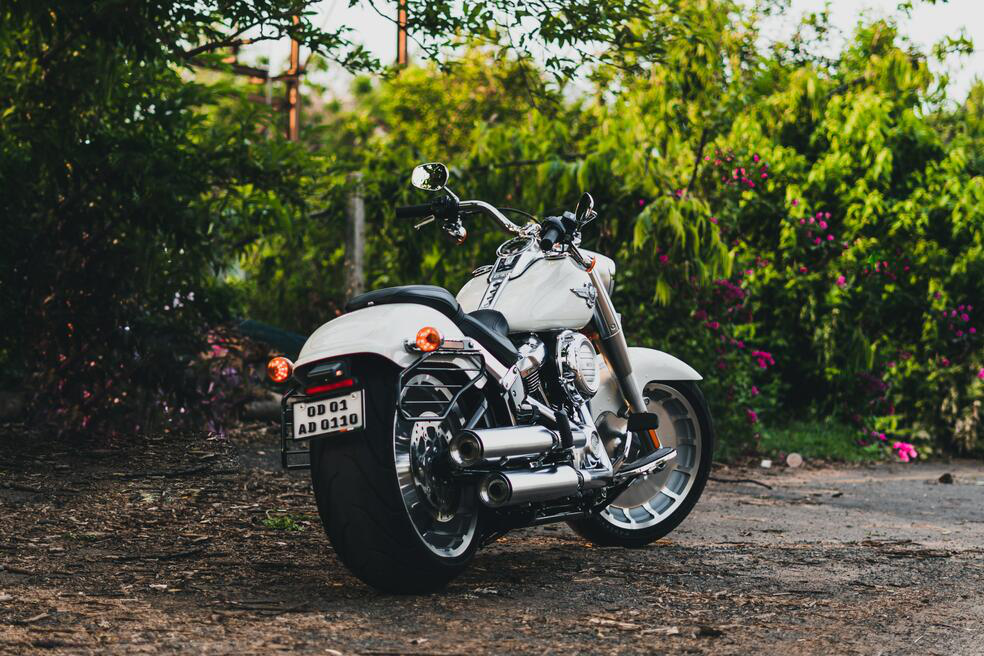

In [1]:
from PIL import Image, ImageDraw
import numpy as np
from numpy import asarray

image = Image.open('image.jpg')

# Show image
# image.show()
display(image)


## For accessing the pixels of the image we have 2 options.

You can read the image size through the size attribute. This is a 2-tuple, containing the horizontal and vertical size in pixels

And the Pillow package uses the Cartesian pixel coordinate system.

(0,0) is the upper left corner coordinates are passed as a tuple in the form (x,y)

And a Rectangles is represented as 4 tuples, the upper left corner is provided first.

In [29]:
image.size

""" Size of the image in pixels (size of original image)

height, width, = im.size """

(984, 656)


## The significance of the size of image 

The dimension of the image is X x Y. What does that actually mean? This means that the dimension of the image is simply the number of pixels across the height(x) and width(y) of the image. In this case, if you count, it would be 984 pixels across the height and 656 pixels across the width. Hence the dimension of this image will be 984 x 656.

---------------------------

## The mode of an image

The mode of an image is a string which defines the type and depth of a pixel in the image. Each pixel uses the full range of the bit depth. So a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on. The current release supports the following standard modes:

* 1 (1-bit pixels, black and white, stored with one pixel per byte)

* L (8-bit pixels, black and white)

* P (8-bit pixels, mapped to any other mode using a color palette)

* RGB (3x8-bit pixels, true color)

* RGBA (4x8-bit pixels, true color with transparency mask)

* CMYK (4x8-bit pixels, color separation)

* YCbCr (3x8-bit pixels, color video format)


Here is how we would obtain the mode for the image we loaded above: 



In [30]:
image.mode
image.getbands()

('R', 'G', 'B')

In [31]:
image.format

'JPEG'

## Get pixel's RGB using PIL

An RGB image can be viewed as three images( a red scale image, a green scale image and a blue scale image) stacked on top of each other.

In [32]:
rgb_im = image.convert('RGB')
r, g, b = rgb_im.getpixel((1, 1))
print(r, g, b)

23 30 23


In [33]:
# First method
pixels = image.load()

# pixel = image.getpixel((x, y))

pix_val = list(image.getdata())

pix_val

pix_val_flat = [x for sets in pix_val for x in sets]

# pix_val_flat

np.array(pix_val_flat).shape

# pixels[x, y] = (r, g, b)

(1936512,)

## Filter

Filters are mathematical functions that take the image as input and return a new image as output.

Filters can be applied on a pixel-level, that is, the output pixel at (x, y) depends only on the input pixel at (x,y). Or on a global level, where the output of a certain pixel depends on multiple input pixels.


Filters can also be applied on a channel-level, that is, applied on every color channel (red, green, and blue) separately. For example, the red channel of the output depends only on the red channel the input.
We will apply a filter by creating a new image with the same dimensions as the input image, then edit its pixels.

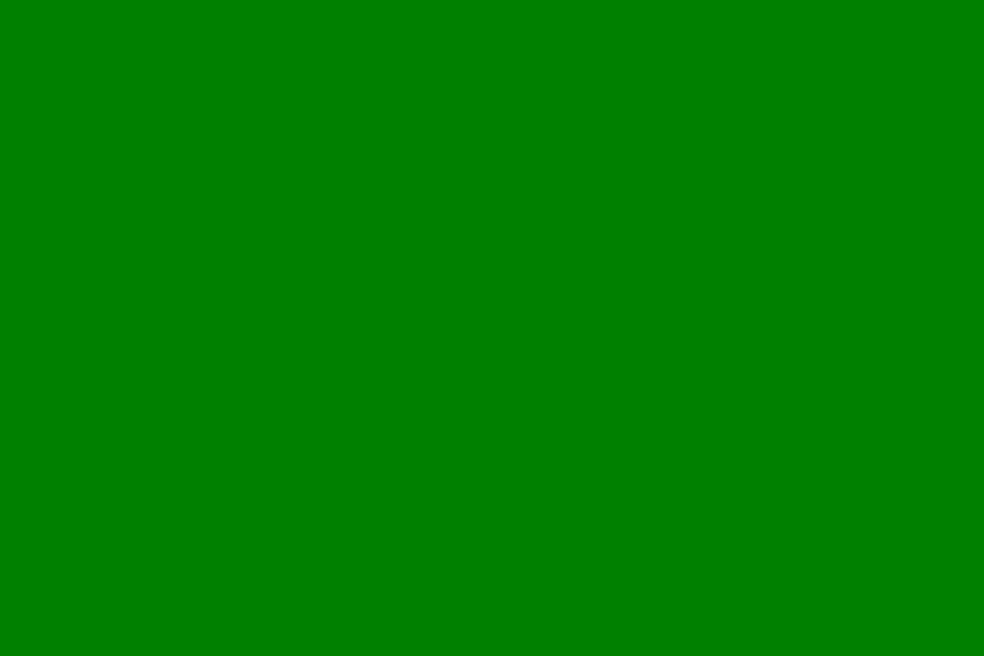

In [34]:
image = Image.open('image.jpg')

# Filter
def filter(image):
    # Get image dimesions
    width, height = image.size

    # Create a white RGB image
    new_image = Image.new("RGB", (width, height), "green")

    # Filter magic happens here

    return new_image

# Show result
new_image = filter(image)

display(new_image)

## What is a Grayscale inside a Computer


A grayscale image is one in which the value of each pixel is a single sample representing only an amount of light; that is, it carries only intensity information and are composed exclusively of shades of gray. 

The contrast ranges from black at the weakest intensity to white at the strongest.

## Difference Between "Black and White" and "Grayscale" Modes

- Black and white (monochrome), only has two "colors", black (ink or toner) and white (no ink or toner).
- Grayscale contains shades of grey (a continuous scale from black to white) and is used for reproducing images or documents that contain more than just black printed text.

## Importance of grayscaling 

- Dimension reduction: For example, In RGB images there are three color channels and has three dimensions while grayscale images are single-dimensional.

- Reduces model complexity: Consider training neural network on RGB images of 10x10x3 pixel. The input layer will have 300 input nodes. On the other hand, the same neural network will need only 100 input nodes for grayscale images.

- Many algorithms are customized to work only on grayscale images e.g. Canny edge detection function pre-implemented in OpenCV library works on Grayscale images only.

## Conversion to Grayscale

An intuitive way to convert a color image 3D array to a grayscale 2D array is, for each pixel, take the average of the red, green, and blue pixel values to get the grayscale value. This combines the lightness or luminance contributed by each color band into a reasonable gray approximation.

We need to convert three color values into a single color value. We can do this by taking their average (also known as the brightness).

We will then put this value in red, green, and blue of the new image. Though, we have to make sure the new values are still integers, so we will use the function int().

Average Method
The Average method takes the average value of R, G, and B as the grayscale value.

### Grayscale = (R + G + B ) / 3.

Theoretically, the formula is 100% correct. But when writing code, you may encounter uint8 overflow error — the sum of R, G, and B is greater than 255. To avoid the exception, R, G, and B should be calculated respectively.

### Grayscale = R / 3 + G / 3 + B / 3.

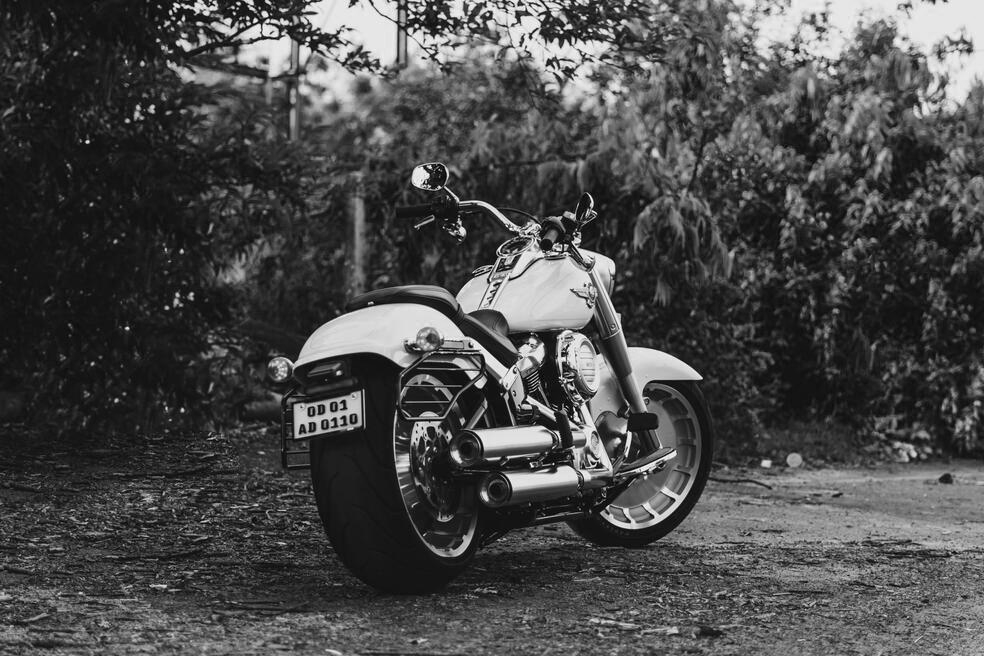

In [35]:
image = Image.open('image.jpg')

def grayscale_conversion(image):
  width, height = image.size
  # iterate over all of the pixels in the image we want to work with
  # Our goal here is to visit each pixel. We will use an iteration to process each row. 
  # Within that iteration, we will use a nested iteration to process each column. 
  # The result is a nested iteration,
  for x in range(width): # This outer loop reads every horizontal row of the image
    for y in range(height): # This inner loop reads each pixel within a horizontal line of pixels
      # Get original pixel colors
      r, g, b = image.getpixel((x, y))      
      # New pixel colors
      # r_ = g_ = b_ = (r+g+b)/3 # Dont use this form of calculation
      r_ = g_ = b_ = (r/3)+(g/3)+(b/3)

      # Change new pixel
      new_pixel = (int(r_), int(g_), int(b_))
      image.putpixel((x, y), new_pixel)          
  return image


image = Image.open('image.jpg')
display(grayscale_conversion(image))

## Another way to convert to grayscale is by taking a weighted sum of the red, green, and blue values.

To our eyes green looks about ten times brighter than blue. So to account for this difference in luminance-perception to human-eyes, through many repetitions of carefully designed experiments, psychologists have figured out how different we perceive the luminance or red, green, and blue to be. They have provided us a different set of weights for our channel averaging to get total luminance.

![Imgur](https://imgur.com/0QPYg5Q.png)

where α₁, α₂, and α₃ are positive constants, such that 

### α₁ + α₂ + α₃ = 1.

These values are usually chosen to be (YUV color encoding system):

## Algorithm for conversion with weighted average

* Read RGB colour image into MATLAB environment
* Extract Red, blue and green colour components from RGB image into 3 different 2-D matrices
* Create a new matrix with the same number of rows and columns as RGB image, containing all zeros .
* Convert each RGB pixel values at location (i, j) to grayscale values by forming a weighted sum of the Red, Green, and Blue colour components and assign it to corresponding location (i, j) in new matrix


## $$grayscale value at (i, j) =$$ 
## $$0.2989 * R(i, j) + 0.5870 * G(i, j) + 0.1140 * B(i, j);$$

So basically we’re more sensitive to green than other colors, so green is weighted most heavily. 

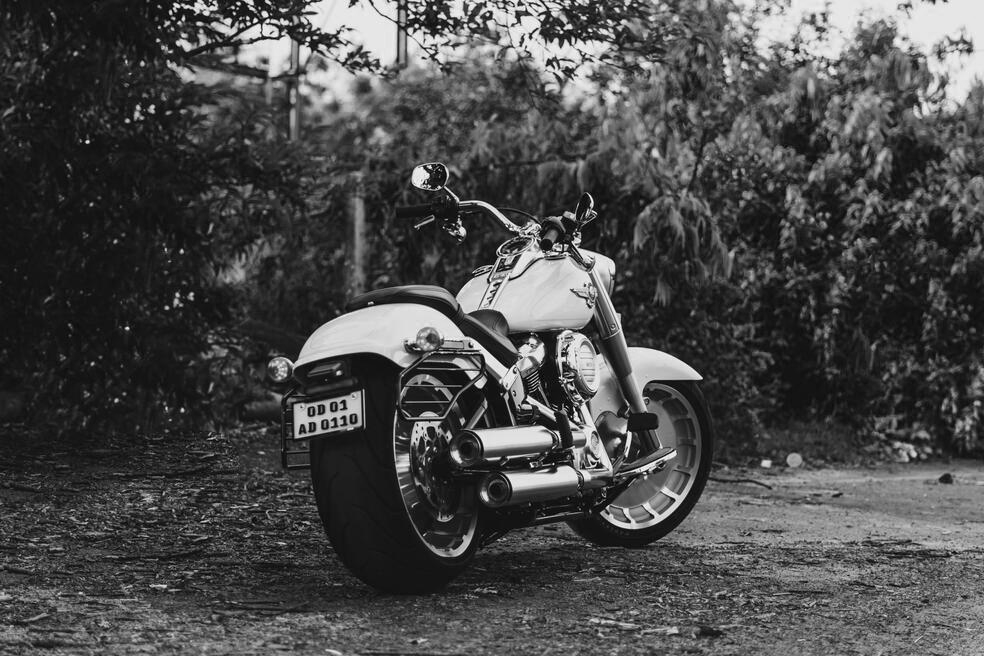

In [36]:
image = Image.open('image.jpg')

def grayscale_conversion_weighted(image):
  width, height = image.size
  # iterate over all of the pixels in the image we want to work with
  # Our goal here is to visit each pixel. We will use an iteration to process each row. 
  # Within that iteration, we will use a nested iteration to process each column. 
  # The result is a nested iteration,
  for x in range(width): # This outer loop reads every horizontal row of the image
    for y in range(height): # This inner loop reads each pixel within a horizontal line of pixels
      # Get original pixel colors
      r, g, b = image.getpixel((x, y))      
      # New pixel colors      
      r_ = g_ = b_ = 0.299*r + 0.587*g + 0.114*b

      # Change new pixel
      new_pixel = (int(r_), int(g_), int(b_))
      image.putpixel((x, y), new_pixel)          
  return image


image = Image.open('image.jpg')
display(grayscale_conversion(image))

## Brightness Increase by adding a factor to each pixel

The brightness of a pixel μ is a value between 0 and 255.

So, to increase the brightness of a pixel μ by Δμ, we can increase every color channel by Δμ.

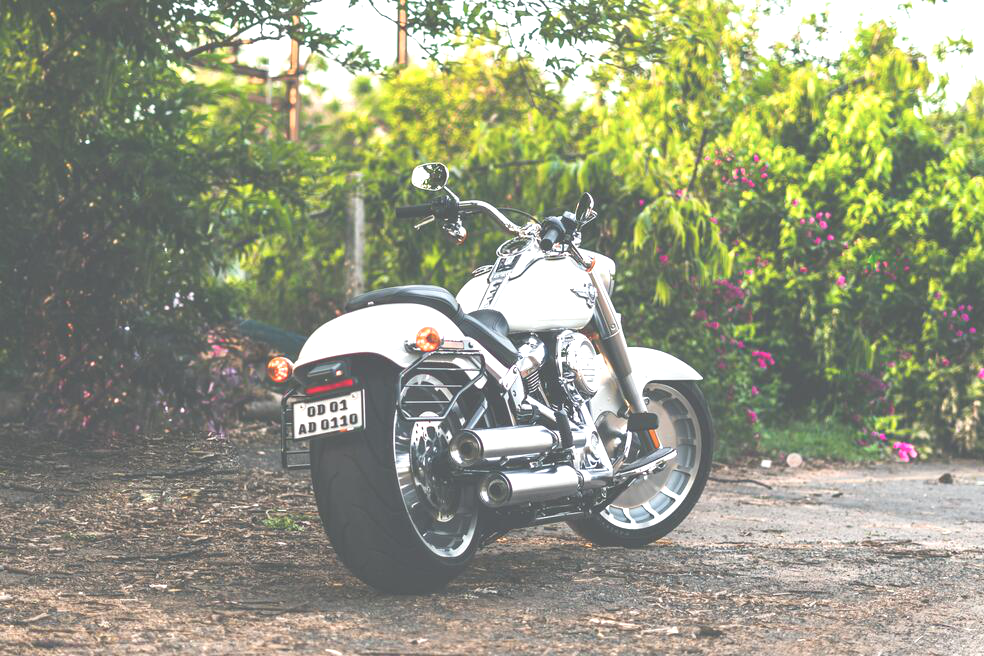

In [38]:
def brighten(input_image, luminosity_factor):
  input_pixel = image.load()
  
  # Creating the output image
  output_image = Image.new('RGB', input_image.size)
  draw_output_img = ImageDraw.Draw(output_image)
  
  # Now will be adding the luminosity_fact on each channel
  
  # iterate over all of the pixels in the image we want to work with
  # Our goal here is to visit each pixel. We will use an iteration to process each row. 
  # Within that iteration, we will use a nested iteration to process each column. 
  # The result is a nested iteration,
  for x in range(output_image.width): # This outer loop reads every horizontal row of the image
    for y in range(output_image.height): # This inner loop reads each pixel within a horizontal line of pixels
      r, g, b = input_pixel[x, y]
      r_ = int(r + luminosity_factor)
      g_ = int(g + luminosity_factor)
      b_ = int(b + luminosity_factor)
      draw_output_img.point((x, y), (r_,g_,b_))
      
  return output_image

luminosity_factor = 70

image = Image.open('image.jpg')
# display(input_image)

display(brighten(image, luminosity_factor))

## Brightness increase with PIL (ImageEnhance.Brightness)

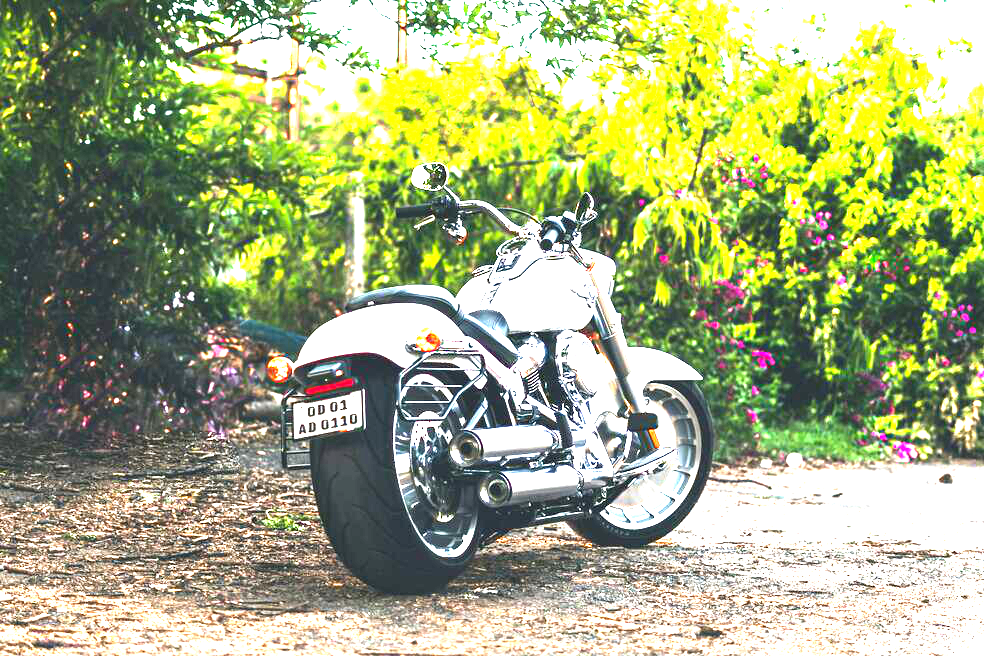

In [39]:
from PIL import Image, ImageEnhance 

image = Image.open('image.jpg')
enhancer = ImageEnhance.Brightness(image)
enhanced_im = enhancer.enhance(2.8)
display(enhanced_im)